# Crypto API Automation Project
## Author = Anshu Tare
### Update = 25/08/2024

In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fffd7687-58bc-4ec0-8617-4e972dbdebb8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# Put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-08-25T14:26:30.643Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9989}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11649, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This is used to see all the columns
pd.set_option('display.max_columns', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974494e+07,1.974494e+07,False,NaN,1,NaN,NaN,None,2024-08-25T14:25:00.000Z,64182.593318,1.941421e+10,-50.1921,0.209802,0.027800,7.163889,-5.049681,4.023308,-7.041118,1.267281e+12,56.1252,1.347834e+12,None,2024-08-25T14:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
1,1027,Ethereum,ETH,ethereum,9244,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202984e+08,1.202984e+08,True,NaN,2,NaN,NaN,None,2024-08-25T14:24:00.000Z,2768.009687,1.134228e+10,-23.9369,0.283664,0.287807,3.800381,-14.856381,-18.203470,-29.732061,3.329870e+11,14.7486,3.329870e+11,None,2024-08-25T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
2,825,Tether USDt,USDT,tether,95329,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.178602e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-25T14:24:00.000Z,1.000590,4.463877e+10,-28.8863,0.001731,0.011362,0.034718,0.057356,0.067290,0.120404,1.179298e+11,5.2233,1.203273e+11,None,2024-08-25T14:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-25 16:25:56.849559
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459354e+08,1.459354e+08,False,NaN,4,NaN,NaN,None,2024-08-25T14:24:00.000Z,576.650480,1.853120e+09,-9.0770,0.013648,-0.769133,7.322741,-0.114186,0.304096,-4.598910,8.415371e+10,3.7270,8.415371e+10,None,2024-08-25T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.660448e+08,5.830424e+08,True,NaN,5,NaN,NaN,None,2024-08-25T14:24:00.000Z,159.392658,2.560636e+09,-14.9356,0.699874,1.054946,9.539415,-12.168806,14.921723,-5.312774,7.428412e+10,3.2899,9.293268e+10,None,2024-08-25T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
5,3408,USDC,USDC,usd-coin,21669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.482372e+10,3.482372e+10,False,NaN,6,NaN,NaN,None,2024-08-25T14:24:00.000Z,1.000102,3.987720e+09,-45.7041,0.021909,0.015140,0.016031,0.003624,0.004303,-0.003008,3.482728e+10,1.5428,3.482728e+10,None,2024-08-25T14:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-25 16:25:56.849559
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-25T14:25:00.000Z,0.605343,1.064531e+09,-13.9015,0.215854,-3.508766,5.807677,2.278045,27.679201,12.964232,3.400823e+10,1.5064,6.053431e+10,None,2024-08-25T14:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
7,74,Dogecoin,DOGE,dogecoin,1045,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.456807e+11,1.456807e+11,True,NaN,8,NaN,NaN,None,2024-08-25T14:25:00.000Z,0.110188,6.668495e+08,-24.0274,0.249603,-1.845135,6.775946,-15.433027,-11.365932,-36.235644,1.605223e+10,0.7109,1.605223e+10,None,2024-08-25T14:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:25:56.849559
8,11419,Toncoin,TON,toncoin,527,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.534725e+09,

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fffd7687-58bc-4ec0-8617-4e972dbdebb8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# Put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\Alex The Analyst Projects\Cypto API Automation Project\Dataset\API.csv'):
        df.to_csv(r'D:\Alex The Analyst Projects\Cypto API Automation Project\Dataset\API.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Alex The Analyst Projects\Cypto API Automation Project\Dataset\API.csv', mode='a', header=False) 
        # a stands for append

In [10]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(20)   #sleep for 1 minute
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [11]:
dfFromScv = pd.read_csv(r'D:\Alex The Analyst Projects\Cypto API Automation Project\Dataset\API.csv')
dfFromScv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974494e+07,1.974494e+07,False,NaN,1,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,64210.036686,1.939636e+10,-49.2556,0.052173,0.015203,7.368689,-4.252113,4.066116,-7.177835,1.267823e+12,56.2069,1.348411e+12,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
1,1,1027,Ethereum,ETH,ethereum,9244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202984e+08,1.202984e+08,True,NaN,2,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,2766.233389,1.132388e+10,-22.9427,-0.003937,0.150177,3.704805,-14.304649,-18.208641,-29.582508,3.327733e+11,14.7497,3.327733e+11,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
2,2,825,Tether USDt,USDT,tether,95329,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.178602e+11,1.202563e+11,True,NaN,3,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,1.000408,4.468821e+10,-27.8168,-0.002728,-0.004375,0.008088,0.038907,0.032276,0.107960,1.179084e+11,5.2261,1.203054e+11,NaN,2024-08-25T14:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-25 16:36:32.848953
3,3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459354e+08,1.459354e+08,False,NaN,4,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,576.405582,1.856485e+09,-8.5859,-0.264249,-0.945975,7.322983,0.158610,0.348099,-4.486071,8.411797e+10,3.7292,8.411797e+10,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.660448e+08,5.830424e+08,True,NaN,5,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,159.140027,2.562209e+09,-14.3156,0.159912,0.429785,9.428910,-11.498911,14.922680,-5.222734,7.416638e+10,3.2884,9.278539e+10,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,2010,Cardano,ADA,cardano,1232,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.595433e+10,3.715711e+10,False,NaN,11,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,0.386662,2.938131e+08,-3.8662,0.619787,-2.058825,14.267350,-6.024468,-1.398371,-16.966558,1.390216e+10,0.6163,1.739977e+10,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
71,11,5805,Avalanche,AVAX,avalanche,767,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.048375e+08,4.448406e+08,False,NaN,12,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,26.915407,3.306188e+08,-13.1217,-0.121687,-1.725848,26.455265,-3.214164,3.665542,-28.406047,1.089637e+10,0.4831,1.926467e+10,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
72,12,5994,Shiba Inu,SHIB,shiba-inu,860,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892702e+14,5.895190e+14,False,NaN,13,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,0.000015,3.291444e+08,9.9848,-0.287370,-2.666631,12.179186,-9.122361,-13.518875,-41.549775,8.932216e+09,0.3960,8.935988e+09,NaN,2024-08-25T14:36:00.000Z,1027.0,Ether

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
dfFromScv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19744940.00000,19744940.00000,False,NaN,1,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,64210.03669,19396355652.65247,-49.25560,0.05217,0.01520,7.36869,-4.25211,4.06612,-7.17783,1267823321753.48462,56.20690,1348410770396.02002,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
1,1,1027,Ethereum,ETH,ethereum,9244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120298356.96027,120298356.96027,True,NaN,2,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,2766.23339,11323875382.36894,-22.94270,-0.00394,0.15018,3.70481,-14.30465,-18.20864,-29.58251,332773331674.59106,14.74970,332773331674.59003,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
2,2,825,Tether USDt,USDT,tether,95329,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,117860216534.16440,120256329980.90352,True,NaN,3,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,1.00041,44688211520.83183,-27.81680,-0.00273,-0.00438,0.00809,0.03891,0.03228,0.10796,117908352520.92784,5.22610,120305444578.50000,NaN,2024-08-25T14:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-25 16:36:32.848953
3,3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145935392.43890,145935392.43890,False,NaN,4,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,576.40558,1856484657.93931,-8.58590,-0.26425,-0.94598,7.32298,0.15861,0.34810,-4.48607,84117974796.80754,3.72920,84117974796.81000,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466044817.28047,583042434.98782,True,NaN,5,NaN,NaN,NaN,2024-08-25T14:35:00.000Z,159.14003,2562209436.25308,-14.31560,0.15991,0.42979,9.42891,-11.49891,14.92268,-5.22273,74166384577.17523,3.28840,92785388560.81000,NaN,2024-08-25T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:36:32.848953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,2010,Cardano,ADA,cardano,1232,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35954331539.39300,37157110715.03300,False,NaN,11,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,0.38666,293813116.11100,-3.86620,0.61979,-2.05882,14.26735,-6.02447,-1.39837,-16.96656,13902160870.90150,0.61630,17399773891.09000,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
71,11,5805,Avalanche,AVAX,avalanche,767,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,404837538.07176,444840638.07176,False,NaN,12,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,26.91541,330618847.18544,-13.12170,-0.12169,-1.72585,26.45526,-3.21416,3.66554,-28.40605,10896367052.68837,0.48310,19264667987.22000,NaN,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
72,12,5994,Shiba Inu,SHIB,shiba-inu,860,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589270237737068.50000,589519023322839.37500,False,NaN,13,NaN,NaN,NaN,2024-08-25T14:36:00.000Z,0.00002,329

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19744940.00000,19744940.00000,False,NaN,1,NaN,NaN,None,2024-08-25T14:36:00.000Z,64210.03669,19396355652.65247,-49.25560,0.05217,0.01520,7.36869,-4.25211,4.06612,-7.17783,1267823321753.48462,56.20690,1348410770396.02002,None,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
1,1027,Ethereum,ETH,ethereum,9244,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298356.96027,120298356.96027,True,NaN,2,NaN,NaN,None,2024-08-25T14:36:00.000Z,2766.49381,11321426442.76651,-22.88280,0.02768,0.18149,3.82598,-14.39040,-18.13757,-29.63628,332804659810.01703,14.75110,332804659810.02002,None,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
2,825,Tether USDt,USDT,tether,95329,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117860216534.16440,120256329980.90352,True,NaN,3,NaN,NaN,None,2024-08-25T14:36:00.000Z,1.00059,44684979692.57434,-27.74670,0.01332,0.01573,0.01819,0.08029,0.08566,0.12146,117929970003.52718,5.22710,120327501547.32001,None,2024-08-25T14:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-25 16:37:55.840340
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935391.23048,145935391.23048,False,NaN,4,NaN,NaN,None,2024-08-25T14:36:00.000Z,576.47046,1857417553.67133,-8.51420,-0.24071,-0.91895,7.34002,0.17668,0.40561,-4.47947,84127442364.84665,3.72970,84127442364.85001,None,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466044799.49971,583042418.12256,True,NaN,5,NaN,NaN,None,2024-08-25T14:36:00.000Z,159.14119,2560920107.39638,-14.34220,0.15245,0.46632,9.43679,-11.50270,14.97225,-5.22360,74166922385.27788,3.28840,92786062238.31000,None,2024-08-25T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
5,3408,USDC,USDC,usd-coin,21669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34823818200.45058,34823818200.45058,False,NaN,6,NaN,NaN,None,2024-08-25T14:36:00.000Z,1.00017,3980180198.98434,-44.54850,0.01786,0.02805,0.00388,0.02546,0.02440,0.01037,34829593115.43130,1.54410,34829593115.43000,None,2024-08-25T14:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-25 16:37:55.840340
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-25T14:37:00.000Z,0.60463,1056163154.04282,-14.72090,-0.08438,-3.82058,5.78300,2.12806,28.02957,13.01172,33968235698.69687,1.50560,60463115715.00000,None,2024-08-25T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-25 16:37:55.840340
7,74,Dogecoin,DOGE,dogecoin,1045,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145680986383.70520,145680986383.70520,True,NaN,8,NaN,NaN,None,2024-08-25T14:37:00.000Z,0.11021,668680414.93335,-23.02300,0.12776,-2.02500,6.95864,-14.94931,-11.28520,-35.96600,16055836792.98057,0.71190,16055836792.98000,None,2024-08-25T14:37:00.000Z,NaN,NaN,N

In [41]:
df3 = dfFromScv.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05217,0.01520,7.36869,-4.25211,4.06612,-7.17783
Ethereum,0.00871,0.16270,3.75327,-14.33895,-18.18021,-29.60401
Tether USDt,0.00369,0.00367,0.01213,0.05546,0.05363,0.11336
BNB,-0.25483,-0.93517,7.32980,0.16584,0.37110,-4.48343
Solana,0.15693,0.44440,9.43206,-11.50043,14.94251,-5.22308
USDC,0.00612,0.01133,-0.00631,-0.00004,-0.01081,-0.00759
XRP,-0.05092,-3.84014,5.73091,2.15216,27.84147,12.99423
Dogecoin,0.14502,-2.02307,6.82375,-14.95572,-11.32045,-36.05729
Toncoin,0.52277,-16.36695,-15.98983,-16.36683,-24.04196,-12.28184


In [42]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.05217
             quote.USD.percent_change_24h     0.01520
             quote.USD.percent_change_7d      7.36869
             quote.USD.percent_change_30d    -4.25211
             quote.USD.percent_change_60d     4.06612
             quote.USD.percent_change_90d    -7.17783
Ethereum     quote.USD.percent_change_1h      0.00871
             quote.USD.percent_change_24h     0.16270
             quote.USD.percent_change_7d      3.75327
             quote.USD.percent_change_30d   -14.33895
             quote.USD.percent_change_60d   -18.18021
             quote.USD.percent_change_90d   -29.60401
Tether USDt  quote.USD.percent_change_1h      0.00369
             quote.USD.percent_change_24h     0.00367
             quote.USD.percent_change_7d      0.01213
             quote.USD.percent_change_30d     0.05546
             quote.USD.percent_change_60d     0.05363
             quote.USD.percent_change_90

In [43]:
type(df4)

pandas.core.series.Series

In [44]:
pd.set_option('display.max_rows', None)
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.05217
            quote.USD.percent_change_24h   0.01520
            quote.USD.percent_change_7d    7.36869
            quote.USD.percent_change_30d  -4.25211
            quote.USD.percent_change_60d   4.06612
            quote.USD.percent_change_90d  -7.17783
Ethereum    quote.USD.percent_change_1h    0.00871
            quote.USD.percent_change_24h   0.16270
            quote.USD.percent_change_7d    3.75327
            quote.USD.percent_change_30d -14.33895
            quote.USD.percent_change_60d -18.18021
            quote.USD.percent_change_90d -29.60401
Tether USDt quote.USD.percent_change_1h    0.00369
            quote.USD.percent_change_24h   0.00367
            quote.USD.percent_change_7d    0.01213
            quote.USD.percent_change_30d   0.05546
            quote.USD.percent_change_60d   0.05363
            quote.USD.percent_change_90d   0.11336
BNB         quote.USD.percent_change_1h   -0.25483
            quote.USD.percent_change_24h  -0.93517
            quote.USD.percent_change_7d    7.32980
            quote.USD.percent_change_30d   0.16584
            quote.USD.percent_change_60d   0.37110
            quote.USD.percent_change_90d  -4.48343
Solana      quote.USD.percent_change_1h    0.15693
            quote.USD.percent_change_24h   0.44440
            quote.USD.percent_change_7d    9.43206
            quote.USD.percent_change_30d -11.50043
            quote.USD.percent_change_60d  14.94251
            quote.USD.percent_change_90d  -5.22308
USDC        quote.USD.percent_change_1h    0.00612
            quote.USD.percent_change_24h   0.01133
            quote.USD.percent_change_7d   -0.00631
            quote.USD.percent_change_30d  -0.00004
            quote.USD.percent_change_60d  -0.01081
            quote.USD.percent_change_90d  -0.00759
XRP         quote.USD.percent_change_1h   -0.05092
            quote.USD.percent_change_24h  -3.84014
            quote.USD.percent_change_7d    5.73091
            quote.USD.percent_change_30d   2.15216
            quote.USD.percent_change_60d  27.84147
            quote.USD.percent_change_90d  12.99423
Dogecoin    quote.USD.percent_change_1h    0.14502
            quote.USD.percent_change_24h  -2.02307
            quote.USD.percent_change_7d    6.82375
            quote.USD.percent_change_30d -14.95572
            quote.USD.percent_change_60d -11.32045
            quote.USD.percent_change_90d -36.05729
Toncoin     quote.USD.percent_change_1h    0.52277
            quote.USD.percent_change_24h -16.36695
            quote.USD.percent_change_7d  -15.98983
            quote.USD.percent_change_30d -16.36683
            quote.USD.percent_change_60d -24.04196
            quote.USD.percent_change_90d -12.28184
TRON        quote.USD.percent_change_1h    1.77335
            quote.USD.percent_change_24h   3.81930
            quote.USD.percent_change_7d   23.17669
            quote.USD.percent_change_30d  20.66980
            quote.USD.percent_change_60d  33.31861
            quote.USD.percent_change_90d  48.11883
Cardano     quote.USD.percent_change_1h    0.61674
            quote.USD.percent_change_24h  -2.07443
            quote.USD.percent_change_7d   14.24466
            quote.USD.percent_change_30d  -6.02117
            quote.USD.percent_change_60d  -1.42049
            quote.USD.percent_change_90d -16.97836
Avalanche   quote.USD.percent_change_1h   -0.11431
            quote.USD.percent_change_24h  -1.72795
            quote.USD.percent_change_7d   26.42666
            quote.USD.percent_change_30d  -3.22594
            quote.USD.percent_change_60d   3.64630
            quote.USD.percent_change_90d -28.40338
Shiba Inu   quote.USD.percent_change_1h   -0.28492
            quote.USD.percent_change_24h  -2.67712
            quote.USD.percent_change_7d   12.17647
            quote.USD.percent_change_30d  -9.13080
            quote.USD.percent_change_60d -13.52915
            quo

In [45]:
df5.count()

values    90
dtype: int64

In [46]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05217
1,Bitcoin,quote.USD.percent_change_24h,0.01520
2,Bitcoin,quote.USD.percent_change_7d,7.36869
3,Bitcoin,quote.USD.percent_change_30d,-4.25211
4,Bitcoin,quote.USD.percent_change_60d,4.06612
5,Bitcoin,quote.USD.percent_change_90d,-7.17783
6,Ethereum,quote.USD.percent_change_1h,0.00871
7,Ethereum,quote.USD.percent_change_24h,0.16270
8,Ethereum,quote.USD.percent_change_7d,3.75327
9,Ethereum,quote.USD.percent_change_30d,-14.33895


In [47]:
df7 = df6.rename(columns={'level_1':'percent_change'})

In [48]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05217
1,Bitcoin,quote.USD.percent_change_24h,0.01520
2,Bitcoin,quote.USD.percent_change_7d,7.36869
3,Bitcoin,quote.USD.percent_change_30d,-4.25211
4,Bitcoin,quote.USD.percent_change_60d,4.06612
5,Bitcoin,quote.USD.percent_change_90d,-7.17783
6,Ethereum,quote.USD.percent_change_1h,0.00871
7,Ethereum,quote.USD.percent_change_24h,0.16270
8,Ethereum,quote.USD.percent_change_7d,3.75327
9,Ethereum,quote.USD.percent_change_30d,-14.33895


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05217
1,Bitcoin,24h,0.01520
2,Bitcoin,7d,7.36869
3,Bitcoin,30d,-4.25211
4,Bitcoin,60d,4.06612
5,Bitcoin,90d,-7.17783
6,Ethereum,1h,0.00871
7,Ethereum,24h,0.16270
8,Ethereum,7d,3.75327
9,Ethereum,30d,-14.33895


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Anshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


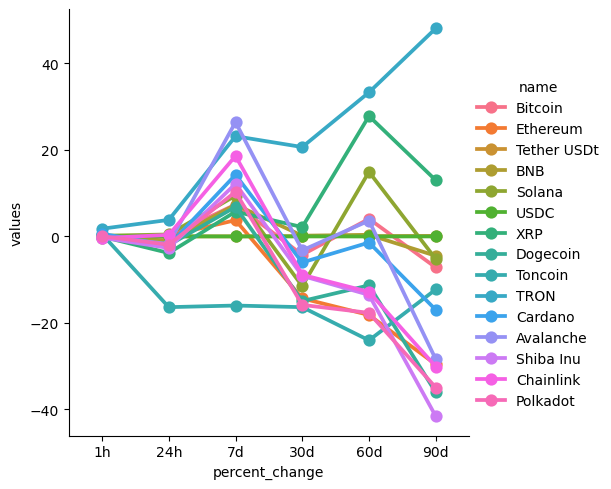

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [74]:
df8 = dfFromScv[['name','quote.USD.price','timestamp']]
df8 = df8.query("name =='Ethereum'")
df8

,name,quote.USD.price,timestamp
1,Ethereum,2766.23339,2024-08-25 16:36:32.848953
16,Ethereum,2766.23339,2024-08-25 16:36:54.268008
31,Ethereum,2766.23339,2024-08-25 16:37:14.740816
46,Ethereum,2766.49381,2024-08-25 16:37:35.257430
61,Ethereum,2766.49381,2024-08-25 16:37:55.840340


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

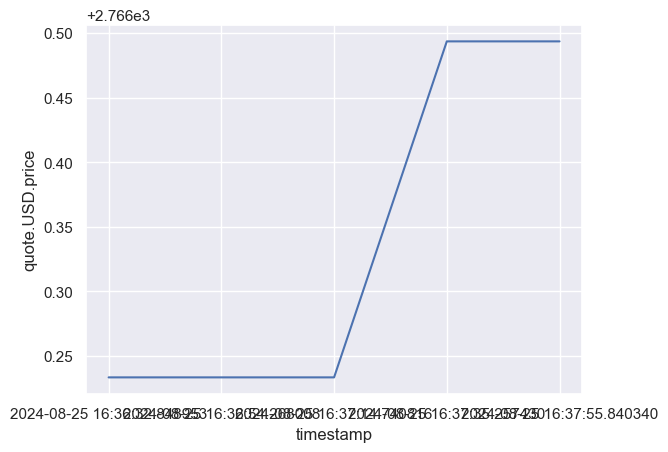

In [75]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)    # will be a straight line since data is gathered with the interval=20 seconds
# can be done by setting interval=1day or further to get detailed variation in prices